# CS 457 - Homework Assignment 5: SQL
## Name: Owais Waheed (ow07611)
### Email: ow07611@st.habib.edu.pk

In [86]:
# !pip install psycopg2-binary
import pandas as pd
import numpy as np

import psycopg2
import pandas.io.sql as psql

import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
# Connecting to PostgreSQL tables
conn = psycopg2.connect(
    host="localhost",
    database="postgres",
    user="postgres",
    password="1234")

In [88]:
# Reading data from the data base and loading them into pandas dataframes

df1 = psql.read_sql("SELECT * FROM EmployeeAttrition1", conn)

df2 = psql.read_sql("Select * From employeeattrition2",conn)

C:\Users\Owais\AppData\Local\Temp\ipykernel_18240\2299353911.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df1 = psql.read_sql("SELECT * FROM EmployeeAttrition1", conn)
C:\Users\Owais\AppData\Local\Temp\ipykernel_18240\2299353911.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df2 = psql.read_sql("Select * From employeeattrition2",conn)


In [89]:
df1.head()

,employee_number,age,business_travel,daily_rate,department,distance_from_home,education,education_field,environment_satisfaction,gender,...,relationship_satisfaction,standard_hours,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_currentrole,years_since_last_promotion,years_with_curr_manager
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,4,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,5,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,7,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2


In [90]:
df2.head()

,employee_number,over_18,over_time,attrition
0,1,Y,Yes,Yes
1,2,Y,No,No
2,4,Y,Yes,Yes
3,5,Y,Yes,No
4,7,Y,No,No


### Analysis No 1

<Figure size 1000x500 with 0 Axes>

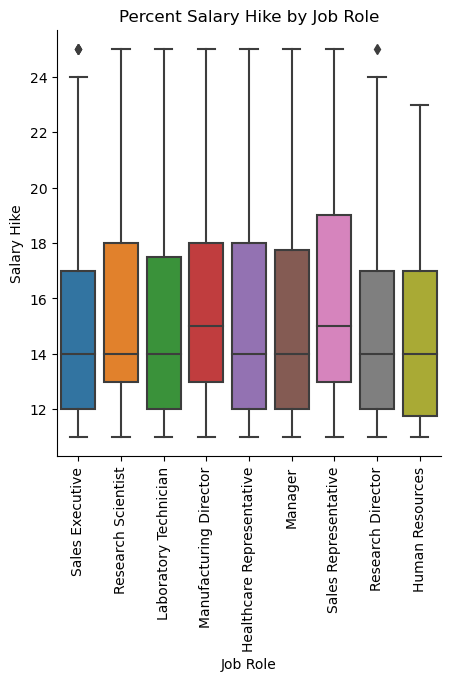

In [91]:
#  Monthly Income by Job Role
plt.figure(figsize=(10, 5))
sns.catplot( x ='job_role', y='percent_salary_hike', kind="box", data=df1)
plt.title('Percent Salary Hike by Job Role')
plt.ylabel('Salary Hike')
plt.xlabel('Job Role')
plt.xticks(rotation=90)
plt.show()

This boxplot shows that there is no significant difference in salary hike of employees at different job roles. This shows that there is not a strong coorelation between the two variables. Meaning, every employee gets equal percentage of salary hike regardless of their jobs. There could be many reason for this, for example every employees goes through same inflation rate so their salary is increased accordingly. 

### Analysis No 2

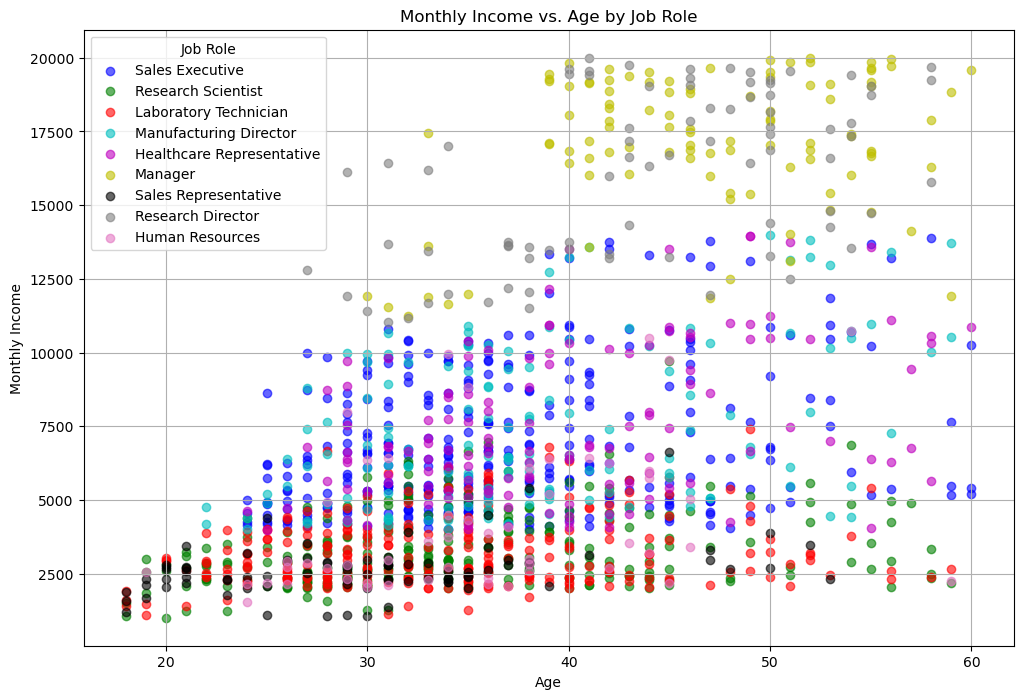

In [92]:
plt.figure(figsize=(12, 8))
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:gray','tab:pink']  # Define colors for different job roles

# Iterate through unique job roles and create scatter plots with different colors
for i, job_role in enumerate(df1['job_role'].unique()):
    subset = df1[df1['job_role'] == job_role]
    plt.scatter(subset['age'], subset['monthly_income'], label=job_role, c=colors[i], alpha=0.6)

plt.title('Monthly Income vs. Age by Job Role')
plt.xlabel('Age')
plt.ylabel('Monthly Income')
plt.legend(title='Job Role')
plt.grid()
plt.show()

The scatter plot provides a good overview of the relationship between age, income, and job role. The data shows that there is a positive correlation between age and income for most job roles, but there is some variation in the strength of this relationship across different job roles. 
Additionally, there is a significant difference in the median monthly income for different job roles.
The scatter plot also shows that the relationship between age and income is not linear and that there is some overlap in the income distributions for different job roles, even at the same age.
<br>One intresting insight from this scatter plot is that, a certain age is required for some jobs. For example most of the managers and directors are above 40 and similarly job roles like lab tecnician, sales representives, research scientists are filled by employees having age < 35.

### Analysis No 3

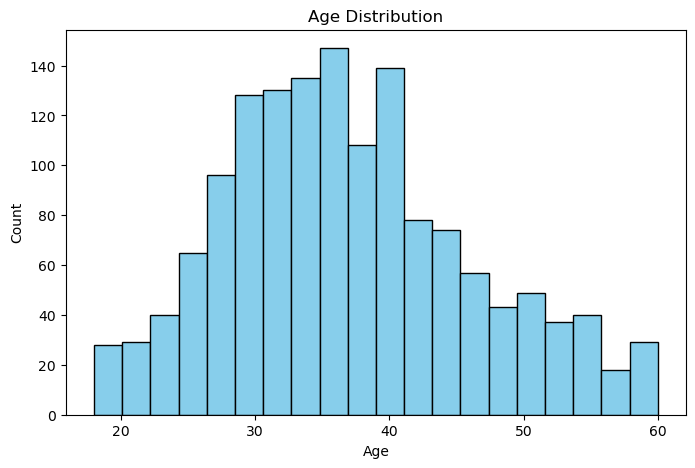

In [93]:
#  Age Distribution
plt.figure(figsize=(8, 5))
plt.hist(df1['age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

This histogram gives an idea of the age distribution of employees. This shows that most employees are between the age 25 and 45 and the number of employees decreases as the age increases beyond 40.